In [1]:
%pylab inline

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, dpi=200)

Populating the interactive namespace from numpy and matplotlib


# Mesures

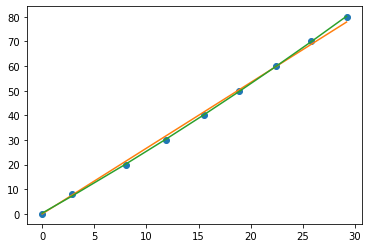

In [2]:
data = np.loadtxt("21-02-05.txt", skiprows=3)
u = data[:,0]
i_multi = data[:,1]*1e-3
i_galva = data[:,2]

#plt.plot(u, i_multi, "o")
plt.plot(u, i_galva, "o")
plt.plot(u, 80/30*u)# + u**2)

import numpy.polynomial.polynomial as nppol
tab = nppol.polyfit(u, i_galva, 2)
y = nppol.polyval(u, tab)
plt.plot(u, y)

# Théorie

0.69 0.5756688531657259 0.577937795482590
écart linéaire vs numérique     : 19.3900114153005 %
écart DL 2nd ordre vs numérique : 0.392592824798611 %
0.14 0.13865424992837636 0.138656363651385
écart linéaire vs numérique     : 0.969040520919447 %
écart DL 2nd ordre vs numérique : 0.00152443274340608 %
8.021409131831525


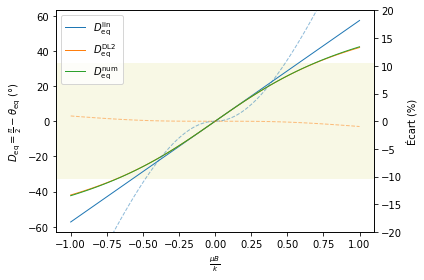

In [3]:
from sympy.solvers import solve, nsolve
from sympy import Symbol
import sympy

a = np.linspace(-1,1,100)

sol_lin = np.pi/2 - a
sol_2nd = np.pi/2 + (1-np.sqrt(1+2*a**2)) / a

x = Symbol("x")
nsolve(0.2*sympy.sin(x) + x - np.pi/2, x, 1)
sol_num = []
for val in a:
    sol = nsolve(val*sympy.sin(x) + x - np.pi/2, x, 1)
    sol_num.append(sol)
sol_num = np.array(sol_num)

plt.figure(figsize=(6,4))
ax1 = plt.subplot2grid((1,1), (0,0))
for sol, leg in zip([sol_lin, sol_2nd, sol_num], [r"$D_\mathrm{eq}^\mathrm{lin}$",
                                                  r"$D_\mathrm{eq}^\mathrm{DL2}$",
                                                  r"$D_\mathrm{eq}^\mathrm{num}$"]):
    plt.plot(a, (np.pi/2-sol)*180/np.pi, lw=1, label=leg)
l = plt.ylim()
plt.axhspan(-33, 33, color='y', alpha=0.1, lw=0)
l = plt.ylim(l)
plt.xlabel(r"$\frac{\mu B}{k}$")
plt.ylabel(r"$D_\mathrm{eq} = \frac{\pi}{2}-\theta_\mathrm{eq}\ (\degree)$")
plt.legend(loc="upper left")

ax2 = ax1.twinx()
plt.plot(a, -(sol_lin-sol_num)*100/np.abs(np.pi/2-sol_num), "--", lw=1, alpha=0.5)
plt.plot(a, -(sol_2nd-sol_num)*100/np.abs(np.pi/2-sol_num), "--", lw=1, alpha=0.5)
plt.ylim(-20,20)
plt.ylabel(r"Écart (%)")

mysavefig("deviation.png")

a = 0.69
dev_lin = a
dev_2nd = - (1-np.sqrt(1+2*a**2)) / a
dev_num = np.pi/2 - nsolve(a*sympy.sin(x) + x - np.pi/2, x, 1)
print(dev_lin, dev_2nd, dev_num)
print("écart linéaire vs numérique     :", np.abs(dev_lin-dev_num)*100/dev_num, "%")
print("écart DL 2nd ordre vs numérique :", np.abs(dev_2nd-dev_num)*100/dev_num, "%")

a = 0.14
dev_lin = a
dev_2nd = - (1-np.sqrt(1+2*a**2)) / a
dev_num = np.pi/2 - nsolve(a*sympy.sin(x) + x - np.pi/2, x, 1)
print(dev_lin, dev_2nd, dev_num)
print("écart linéaire vs numérique     :", np.abs(dev_lin-dev_num)*100/dev_num, "%")
print("écart DL 2nd ordre vs numérique :", np.abs(dev_2nd-dev_num)*100/dev_num, "%")
print(a*180/np.pi)

# 2021-03-12

##### Fit results #####
FIT FUNCTION: linear
RAW
        params_key      : ['slope', 'y0']
        optimised params: [ 7.25699459e+02 -2.71384885e-03]
        uncertainties   : [2.37503302 0.00309889]
        chi2r           : 0.8860222909861923
        r2              : 0.9999335736334585
READABLE
        slope      = (7.26 +/- 0.02) * 1e2
        y0         = (-3 +/- 3) * 1e-3
#######################


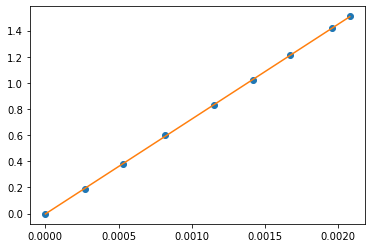

In [13]:
from fitting.fitting import Fit

u = np.array([0, .19, .38, .6, .83, 1.02, 1.21, 1.42, 1.51])
uu = np.ones(len(u))*.005
i = np.array([0, .27, .53, .82, 1.15, 1.42, 1.67, 1.96, 2.08])*1e-3

fitter = Fit("linear", x=i, y=u, uy=uu)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)

slope, y0 = fit_params
plt.plot(i, u, "o")
plt.plot(i, slope*i+y0, "-C1")